# Importing libraries

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import warnings
warnings.filterwarnings("ignore")

# Data Overview

## Variable Notes

***
**1) `survival:`** Survival.

* <font color='blue'>0</font> = No
* <font color='blue'>1</font> = Yes
***
**2) `pclass:`** A proxy for socio-economic status (SES).

* <font color='blue'>1st</font> = Upper level
* <font color='blue'>2nd</font> = Middle level
* <font color='blue'>3rd</font> = Lower level
***
**3) `age:`** Age in years.
* Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5
***
**4) `sibsp:`** The number of siblings or spouses.

* <font color='blue'>Sibling</font> = brother, sister, stepbrother, stepsister
* <font color='blue'>Spouse</font> = husband, wife (mistresses and fiancés were ignored)
***
**5) `parch:`** The number of parents or children.

* <font color='blue'>Parent</font> = mother, father
* <font color='blue'>Child</font> = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.
***
**6) `embarked:`** Port of Embarkation.

* <font color='blue'>C</font> = Cherbourg, 
* <font color='blue'>Q</font> = Queenstown, 
* <font color='blue'>S</font> = Southampton.
***

In [55]:
df_train = pd.read_csv("titanic_data/train.csv")
df_test_in = pd.read_csv("titanic_data/test.csv")
df_test_out = pd.read_csv("titanic_data/gender_submission.csv")

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df_test_in.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
df_test_out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Exploratory Data Analysis | EDA

## Merging Testing Set and Gender Submission

In [59]:
df_test = pd.merge(df_test_in, df_test_out, on='PassengerId', how='outer')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


## Training Set
* `df_train.shape`: Shows the number of rows and columns in the training dataset.
* `df_train.describe()`: Provides a statistical summary of the training dataset's numeric columns.
* `df_train.isnull().sum()`: Counts the number of missing values in each column of the training dataset.

In [60]:
print('Training set shape:', df_train.shape)
print('\nTraining set columns:', df_train.columns)
print('\nTraining set description:')
df_train.describe()

Training set shape: (891, 12)

Training set columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Training set description:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
print("Training Set null data info:\n")
df_train_null  = df_train.isnull().sum()
print(df_train_null[df_train_null>0])

Training Set null data info:

Age         177
Cabin       687
Embarked      2
dtype: int64


***
* **Age:** 177 missing values. This significant number of missing entries in the `Age` column might impact any analysis or predictive modeling that depends heavily on age. Methods such as imputation (replacing missing values with the **mean**, **median**, **mode**, or using **other algorithms**) might be necessary to handle these gaps.

* **Cabin:** 687 missing values, which is a substantial portion of the data. This high number of missing values in the `Cabin` column could indicate that cabin information was not well recorded or is missing for many passengers. This missing data might be critical if cabin location is a significant factor in survival rates, and it poses challenges for using this variable in predictive models without substantial data imputation or feature engineering.

* **Embarked:** 2 missing values, indicating that almost all passengers have recorded embarkation points, with only a very few missing.
***

In [63]:
df_train_list = [df_train.Survived, df_train.Pclass, df_train.Sex, df_train.SibSp, df_train.Parch, df_train.Embarked]

print("===========================================")
for i in df_train_list:
    print(i.value_counts())
    print("===========================================")

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


***
From the above info, we can see that in the `Embarked` list the number of **S** designation is a lot more than any other. We can then replace all null with **S**.
***

## Testing Set

In [64]:
print('Testing set shape:', df_test.shape)
print('\nTesting set columns:', df_test.columns)
print('\nTesting set description:')
df_test.describe()

Testing set shape: (418, 12)

Testing set columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

Testing set description:


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [65]:
print("Testing Set null data info:\n")
df_test_null  = df_test.isnull().sum()
print(df_test_null[df_test_null>0])

Testing Set null data info:

Age       86
Fare       1
Cabin    327
dtype: int64


## Visualizations of Age distribution by Survival

***
The age null data can be replaced with mean, median, or moda of the data, or I can just drop the null data. However, each choice might affect to the performance of model prediction. Therefore, I will do some visual to see the difference of age distribustion, when the data is replaced with some other data. Also, at the final section I will make an ablation study to check the the replaced data effect, als to check different models on this data problem.
***

In [66]:
df_train_temp1 = df_train.copy() # For replacement with mean data
df_train_temp2 = df_train.copy() # For replacement with median data
df_train_temp3 = df_train.copy() # For replacement with mode data
df_train_temp4 = df_train.copy() # For dropping null data
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
df_train_temp1['Age'].fillna(df_train_temp1['Age'].mean(), inplace=True)
df_train_temp1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
df_train_temp2['Age'].fillna(df_train_temp2['Age'].median(), inplace=True)
df_train_temp2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df_train_temp3['Age'].fillna(df_train_temp3['Age'].mode()[0], inplace=True)
df_train_temp3.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df_train_temp4.dropna(subset=['Age'])  # Strange, doesn't work
df_train_temp4.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

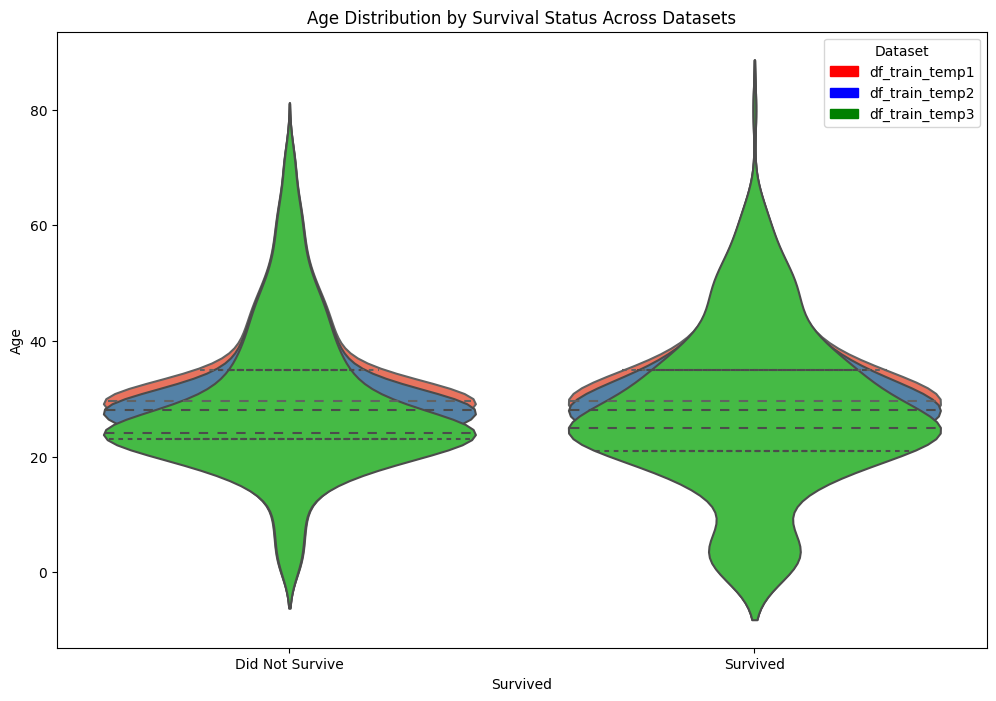

In [71]:
plt.figure(figsize=(12, 8))

# Violin plot for df_train_temp1
sns.violinplot(x='Survived', y='Age', data=df_train_temp1, palette=['#FF6347'], split=True, scale='width', inner='quartile', label='Temp1')

# Violin plot for df_train_temp2
sns.violinplot(x='Survived', y='Age', data=df_train_temp2, palette=['#4682B4'], split=True, scale='width', inner='quartile', label='Temp2')

# Violin plot for df_train_temp3
sns.violinplot(x='Survived', y='Age', data=df_train_temp3, palette=['#32CD32'], split=True, scale='width', inner='quartile', label='Temp3')

# Adding titles and labels
plt.title('Age Distribution by Survival Status Across Datasets')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

# Creating custom legend handles
handles = [plt.Rectangle((0,0),1,1, color='red', edgecolor='none'),
           plt.Rectangle((0,0),1,1, color='blue', edgecolor='none'),
           plt.Rectangle((0,0),1,1, color='green', edgecolor='none')]

# Adding a legend to differentiate the data sources
plt.legend(handles, ['df_train_temp1', 'df_train_temp2', 'df_train_temp3'], title='Dataset')

plt.show()

In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Further Data Preprocessing ideas:**
***
* we can replace male = 1, and female = 0
* we can combine the number of SigSp and Parch into one Family feature
* we can use Name feature to get addressing titles, which is also indicator of marital status
* we can drop Ticket numbers, they mean nothing
* we can divide Fare into groups, that is also an indicator of socio-economic status, I believe
* we can replace Embarked list with numerical values
***

In [73]:
def Preprocess(data, data_type, age_null_act, fare_null_act, embarked_null_act):
    if age_null_act=='mean':
        data['Age'].fillna(data['Age'].mean(), inplace=True)
    elif age_null_act=='median':
        data['Age'].fillna(data['Age'].median(), inplace=True)
    else:
        data['Age'].fillna(data['Age'].mode()[0], inplace=True)
    
    if data_type=='test':
        if fare_null_act=='mean':
            data['Fare'].fillna(round(data['Fare'].mean(), 2), inplace=True)
        elif fare_null_act=='median':
            data['Fare'].fillna(round(data['Fare'].median(), 2), inplace=True)
        else:
            data['Fare'].fillna(round(data['Fare'].mode()[0], 2), inplace=True)
    else:
        if embarked_null_act=='S':
            data['Embarked'].fillna("S", inplace=True)
        elif embarked_null_act=='C':
            data['Embarked'].fillna("C", inplace=True)
        else:
            data['Embarked'].fillna("Unknown", inplace=True)
    
    data['Cabin'].fillna("Unknown", inplace=True)
    data['Sex'] = data['Sex'].replace(["male", "female"], [1, 0])
    data.drop(columns=['Name','Ticket', 'Cabin'], inplace=True)
    data = pd.get_dummies(data, columns=['Embarked'])
    return data

In [74]:
df_train = Preprocess(df_train, data_type='train', age_null_act='mean', fare_null_act='mean', embarked_null_act='S')

In [75]:
df_test = Preprocess(df_test, data_type='test', age_null_act='mean', fare_null_act='mean', embarked_null_act='S')

# Model Training

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [78]:
y_test = df_test[['Survived']]
df_test = df_test.drop(columns='Survived')
X_test = df_test

In [79]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
print(len(X_train))

891


In [81]:
log_reg_model=LogisticRegression(solver='liblinear')
log_reg_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [86]:
y_pred = log_reg_model.predict(X_test)
print("Survived:", sum(y_pred!=0))
print("NOT Survived:", sum(y_pred==0))

Survived: 159
NOT Survived: 259


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.91      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



Text(0.5, 1.05, 'Confusion Matrix')

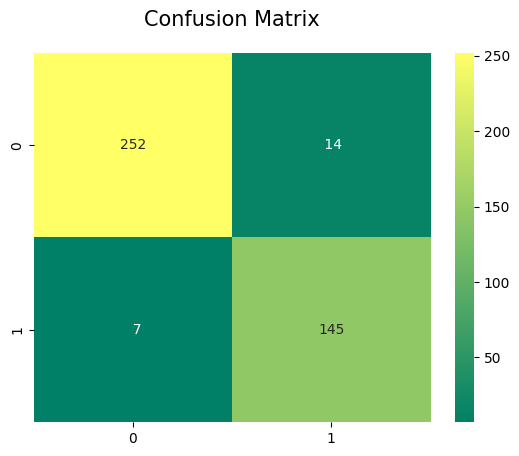

In [88]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='3.0f', cmap="summer")
plt.title('Confusion Matrix', y=1.05, size=15)

In [93]:
print('Model prediction accuracy using Log Regression:', round(accuracy_score(y_test, y_pred), 4)*100, '%')

Model prediction accuracy using Log Regression: 94.98 %


In [94]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)